In [90]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose

In [91]:
plt.rcParams['figure.dpi'] = 300
colors = sns.color_palette("Blues")

### Data import

In [7]:
df = yf.download('AAPL', start='2010-01-01', end='2024-6-30')

[*********************100%%**********************]  1 of 1 completed


In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461978,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358410,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800


### Time series visualization

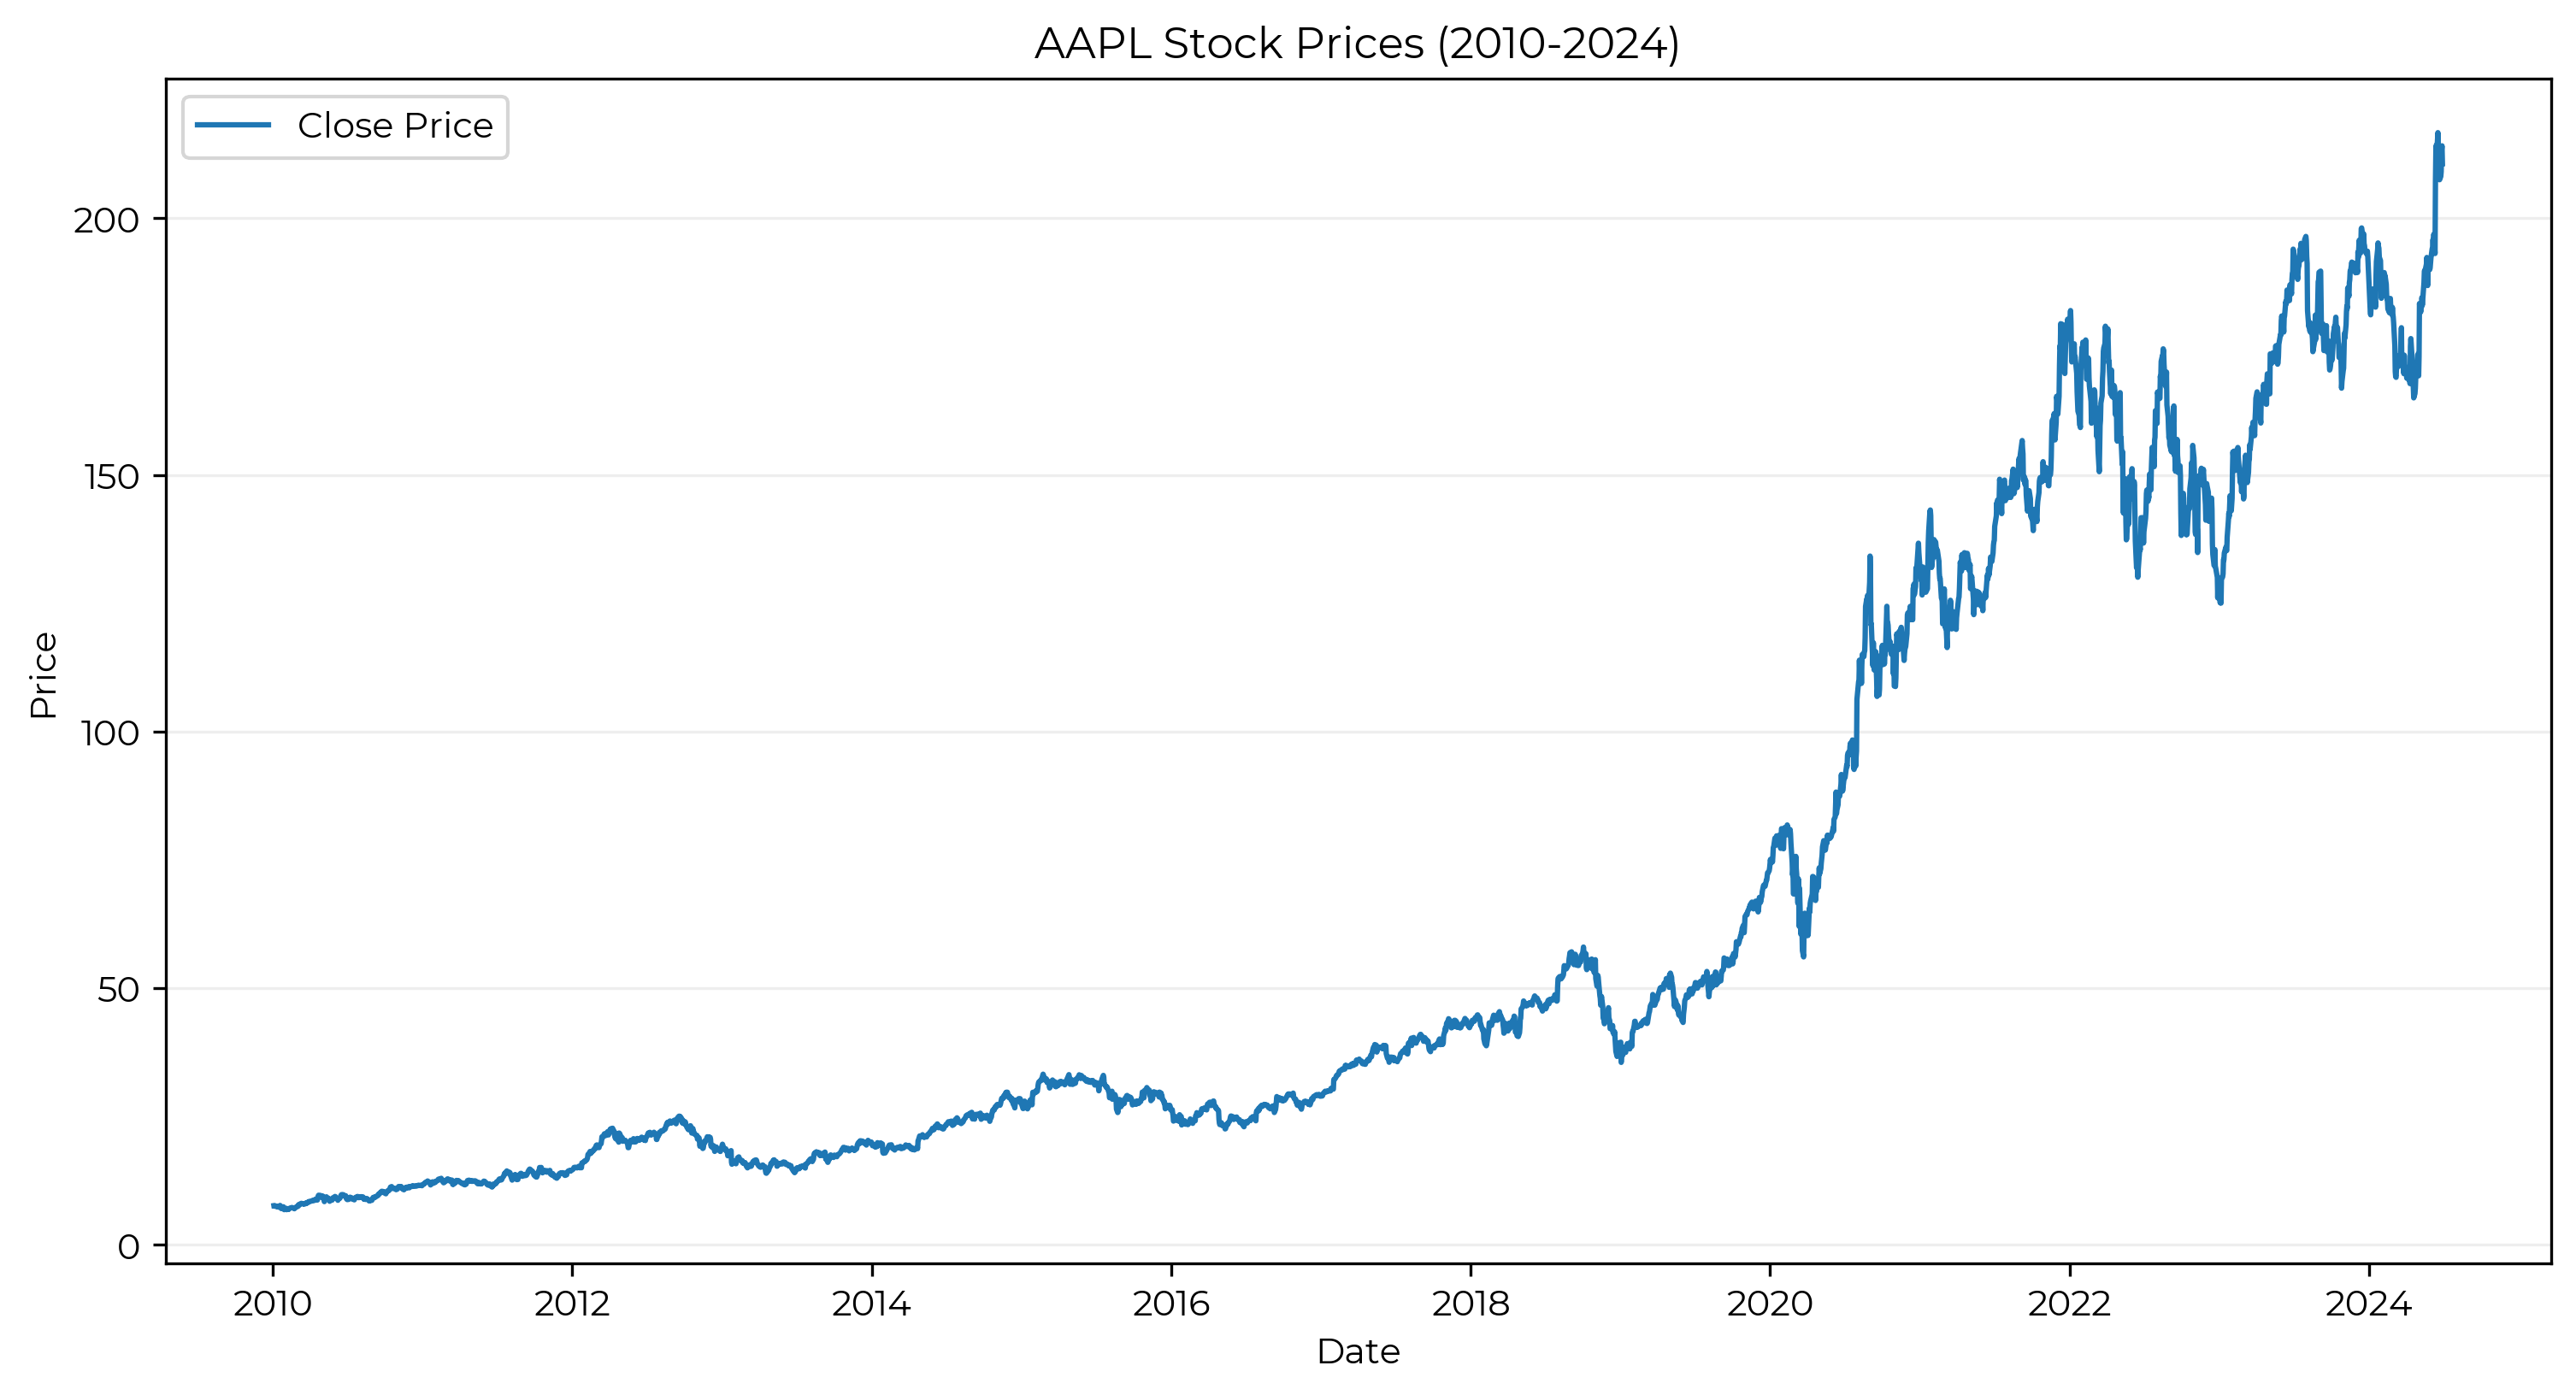

In [68]:
# Full dataset visualization

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.index, df['Close'], label='Close Price')
ax.set_title('AAPL Stock Prices (2010-2024)')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.show()

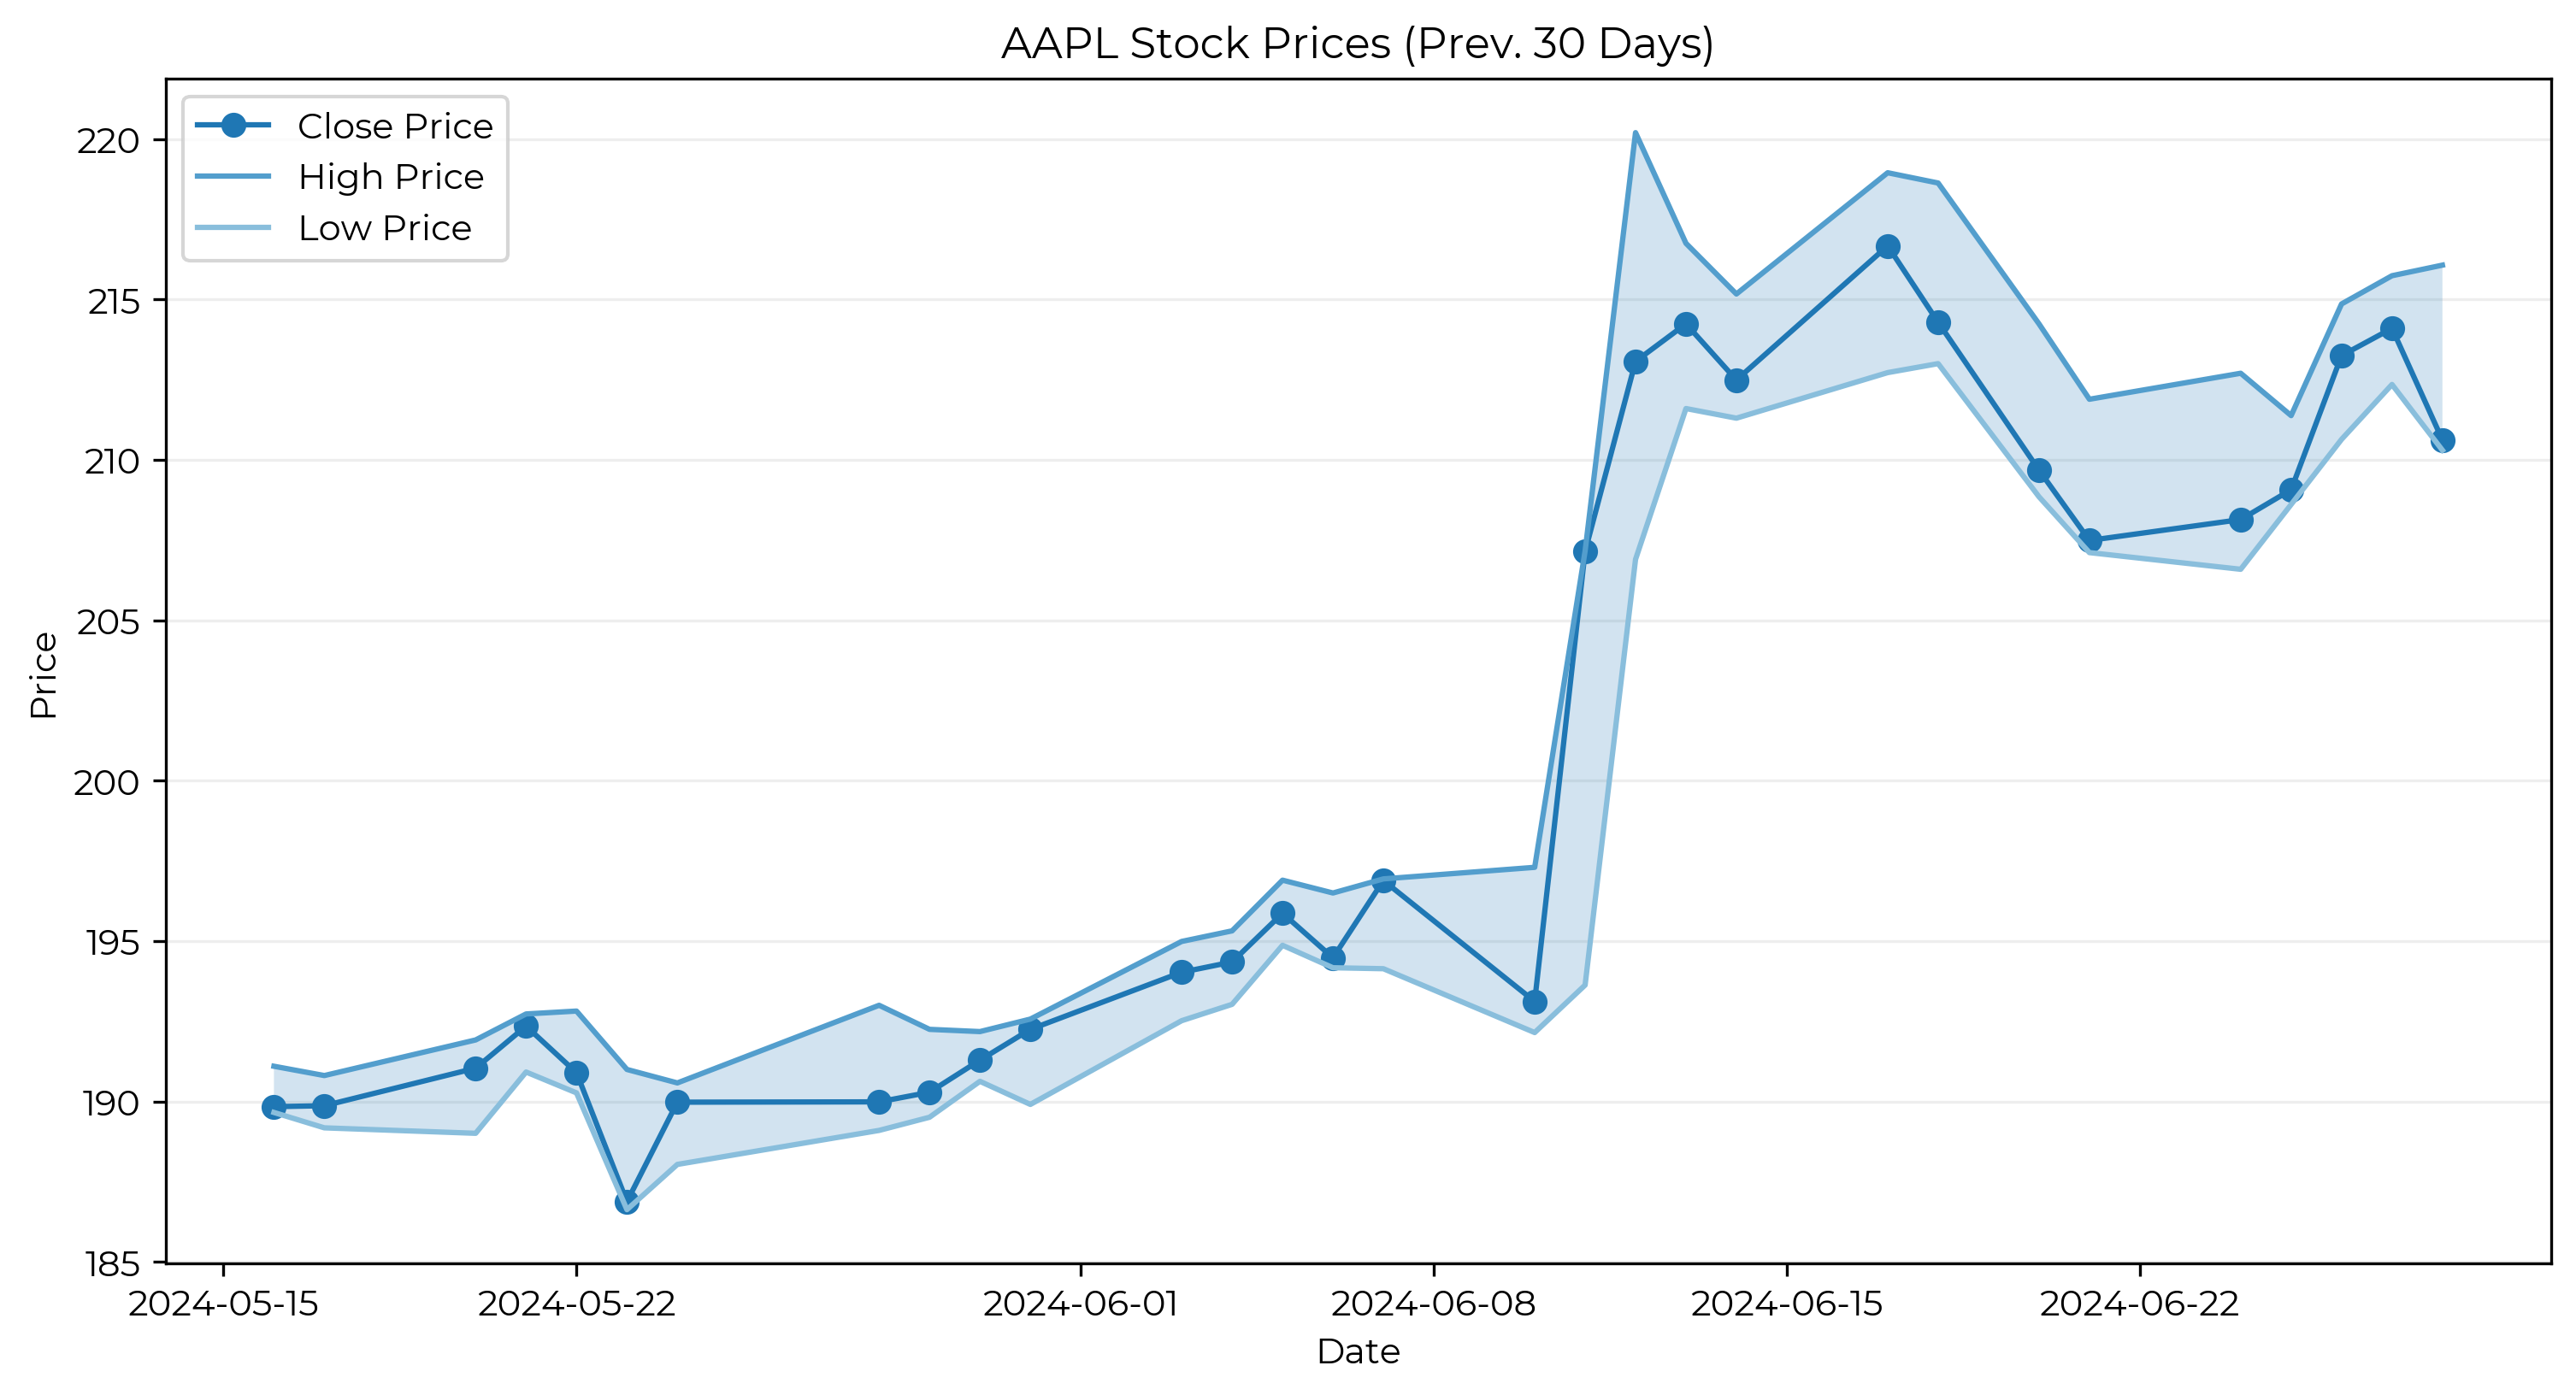

In [94]:
# Previous 30 days visualization

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.index[-30:], df['Close'].iloc[-30:], label='Close Price', marker='o')
ax.fill_between(df.index[-30:], df['Low'].iloc[-30:], df['High'].iloc[-30:], alpha=0.2)
ax.plot(df.index[-30:], df['High'].iloc[-30:], label='High Price', color=colors[3])
ax.plot(df.index[-30:], df['Low'].iloc[-30:], label='Low Price', color=colors[2])
ax.set_title('AAPL Stock Prices (Prev. 30 Days)')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.show()

In [40]:
# Initialize decomposition model

decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=252)

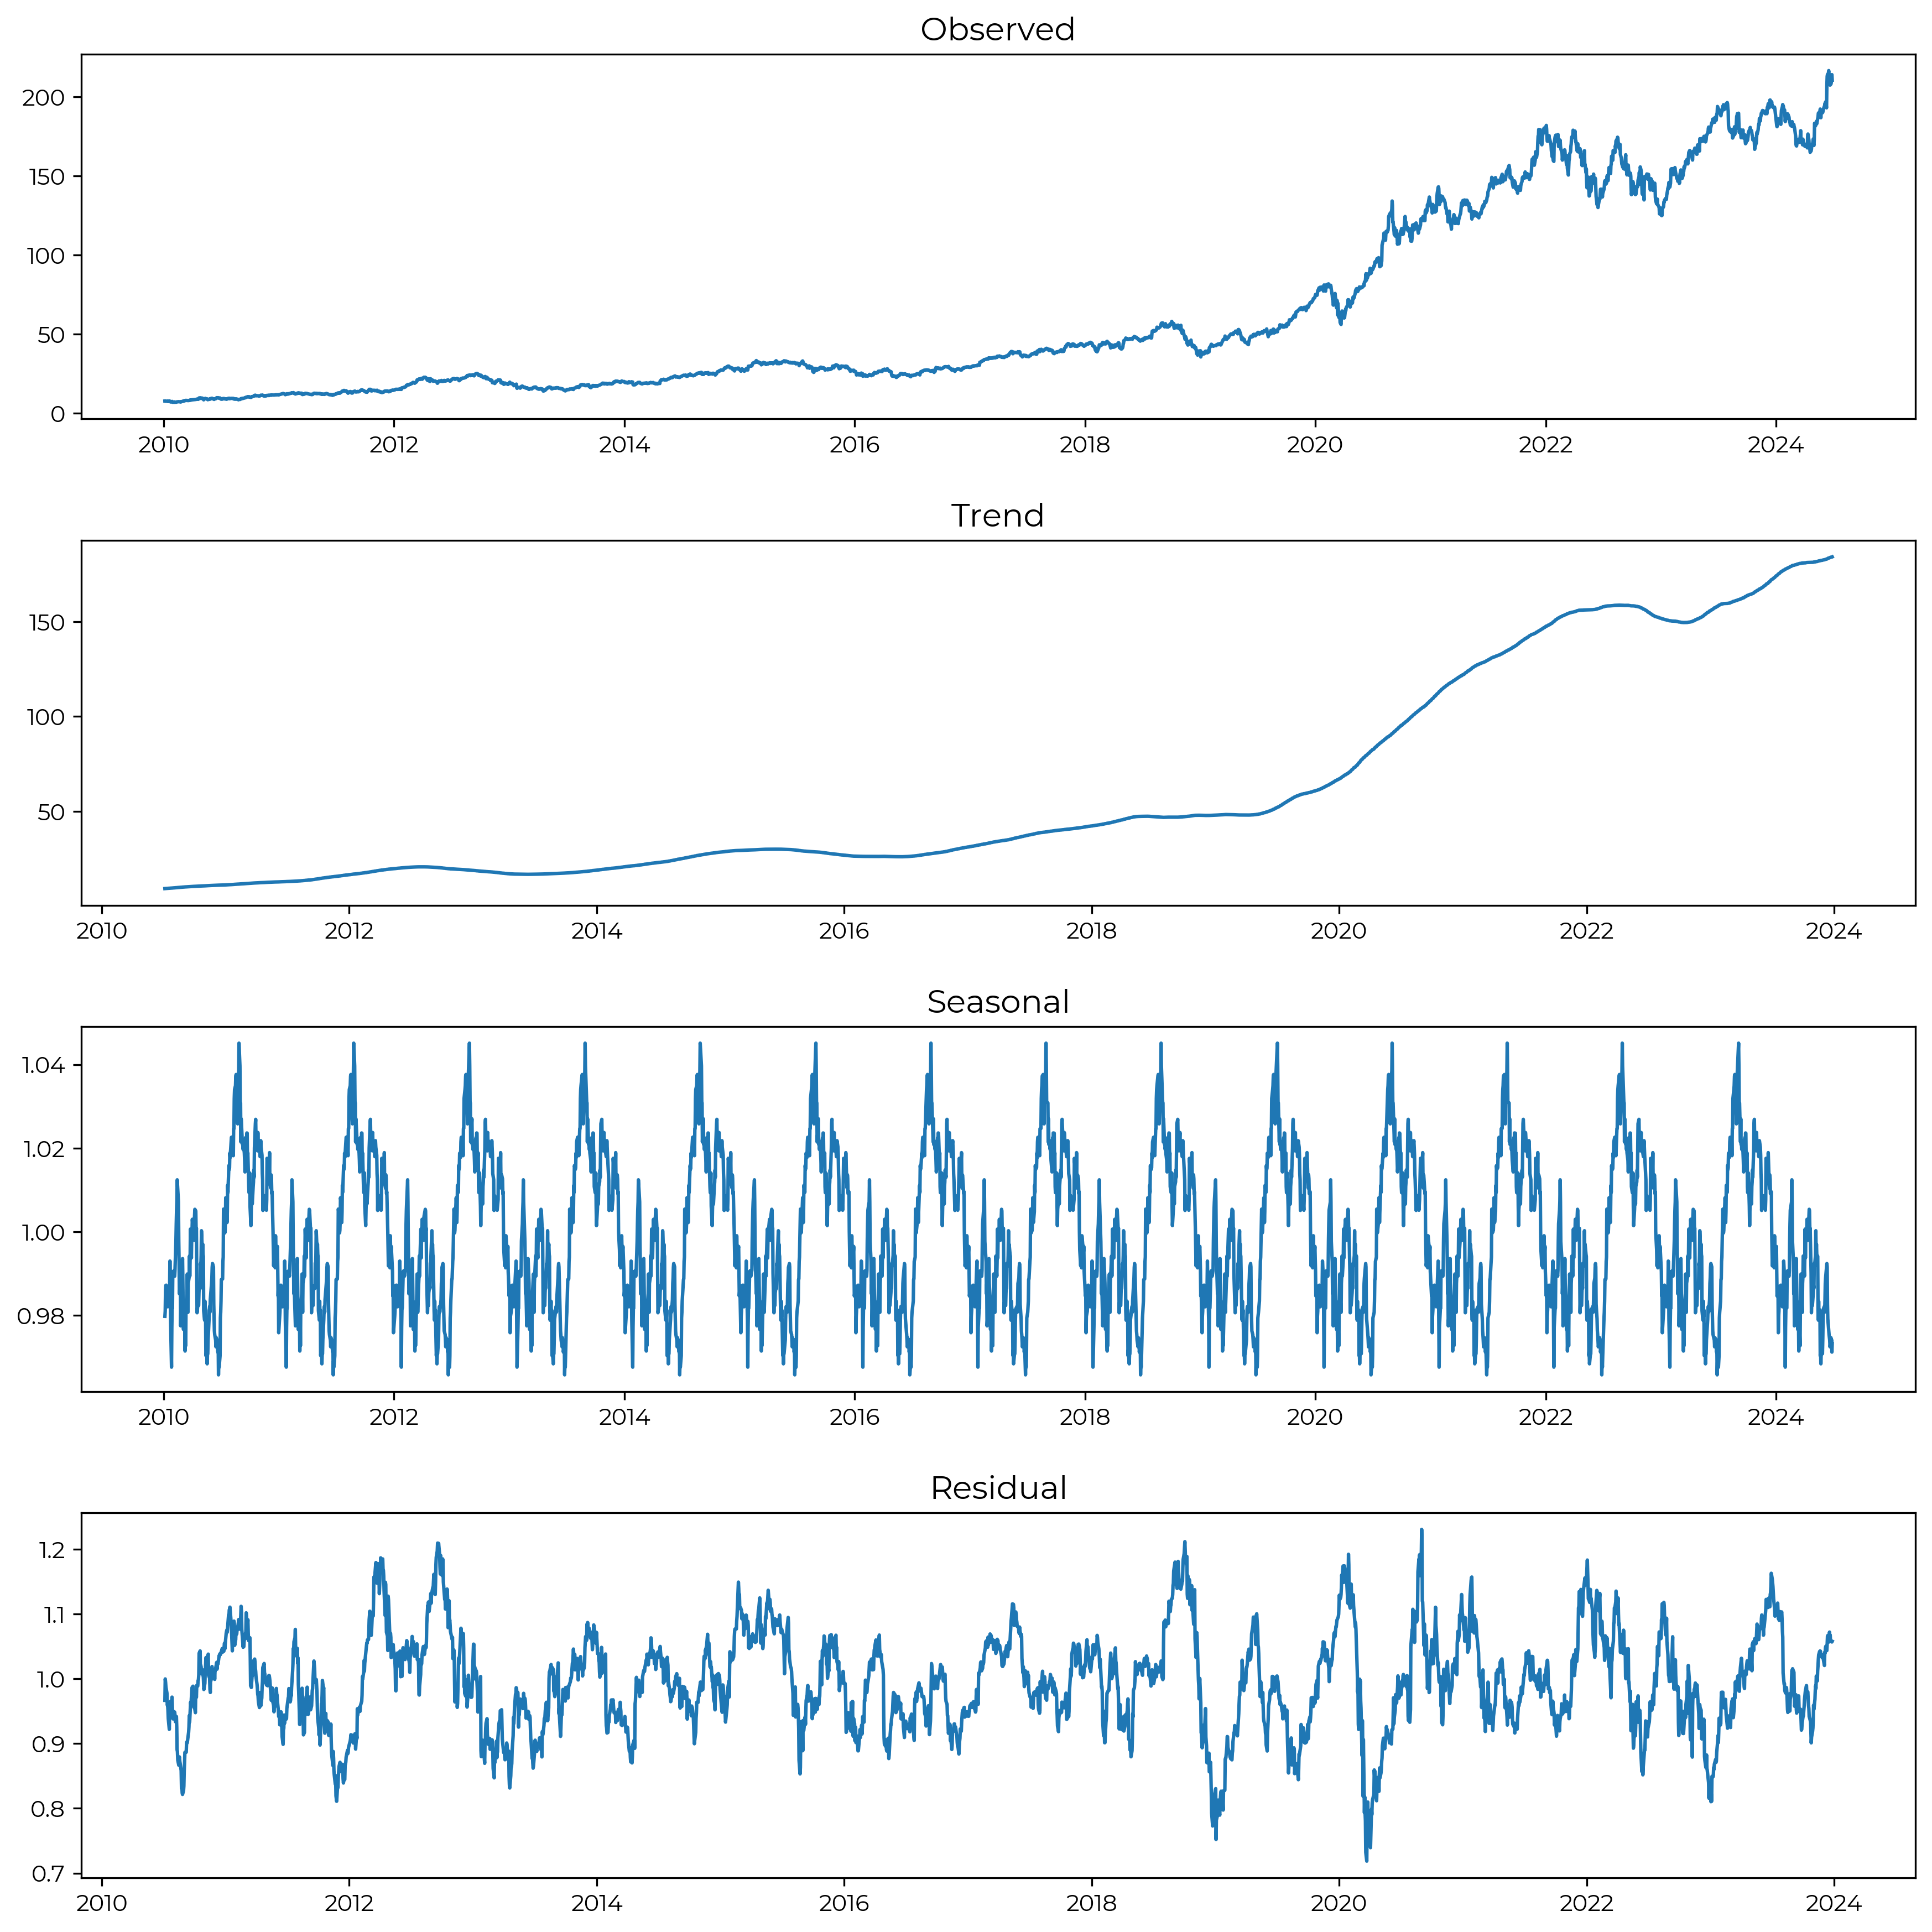

In [62]:
# Decomposition visualization

fig, axes = plt.subplots(4, 1, figsize=(12, 12))

# Observed
axes[0].plot(decomposition.observed)
axes[0].set_title('Observed', fontsize=14)

# Trend
axes[1].plot(decomposition.trend)
axes[1].set_title('Trend', fontsize=14)

# Seasonal
axes[2].plot(decomposition.seasonal)
axes[2].set_title('Seasonal', fontsize=14)

# Residual
axes[3].plot(decomposition.resid)
axes[3].set_title('Residual', fontsize=14)

plt.tight_layout(pad=2.0)
plt.show()